In [106]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### **Exploración de Precios en el Mundo de las Laptops**


En la era digital, la elección de la laptop adecuada se ha convertido en una tarea crucial para profesionales, estudiantes y entusiastas por igual. Con una amplia gama de opciones disponibles, desde dispositivos ultraportátiles hasta estaciones de trabajo potentes, la toma de decisiones se ha vuelto cada vez más desafiante. Este proyecto se embarca en un análisis exhaustivo de una base de datos compuesta por diversas laptops, con el objetivo de desentrañar los factores que influyen en sus precios.


### **El Propósito del Análisis:**


En el corazón de este proyecto yace la pregunta esencial: ¿cómo afectan las especificaciones técnicas de una laptop a su precio? Este interrogante es crucial no solo para los consumidores que buscan la mejor relación calidad-precio, sino también para fabricantes y vendedores que buscan comprender las tendencias del mercado. A través de un examen detallado de las especificaciones de cada laptop en nuestra base de datos, buscamos arrojar luz sobre las relaciones subyacentes que determinan el valor monetario de estos dispositivos.


### **La Base de Datos:**


Nuestra base de datos abarca un amplio espectro de laptops, desde modelos de entrada hasta aquellos diseñados para satisfacer las necesidades más exigentes. Cada entrada está detalladamente anotada con especificaciones técnicas que abarcan desde el rendimiento del procesador y la capacidad de almacenamiento hasta detalles más específicos como la resolución de la pantalla y las capacidades gráficas. Esta información se convierte en el lienzo sobre el cual pintaremos un retrato comprensivo de cómo estas características técnicas se traducen en términos de precio.



### **Enfoque en el Precio:**


Si bien las especificaciones técnicas son cruciales, el precio sigue siendo un factor determinante para la mayoría de los consumidores. Exploraremos cómo elementos como la potencia del procesador, la capacidad de la memoria RAM y la calidad de la pantalla contribuyen a la formación del precio final. Este análisis no solo proporcionará una visión más profunda para los compradores potenciales, sino que también puede ser instrumental para la industria en la toma de decisiones estratégicas.



Este proyecto no solo busca revelar las complejidades del mercado de laptops, sino también facilitar la toma de decisiones informada para aquellos que buscan la combinación perfecta entre rendimiento y precio en el vertiginoso mundo de la tecnología portátil.ía portátil.ía portátil.

In [213]:
# Importo database
url = 'https://raw.githubusercontent.com/francochifla/Data_Science_Coderhouse/main/laptop_price.csv'
laptop = pd.read_csv(url, sep = ',')
laptop.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


## EDA

### ¿Cómo se comportan los precios de los equipos en el dataset?



En la exploración de nuestro dataset de laptops, nos sumergimos en la fascinante tarea de comprender la distribución de precios que gobierna este mercado tecnológico. A través del siguiente histograma, delineamos las frecuencias con las que distintos rangos de precios se manifiestan en nuestra colección de laptops. Este análisis nos proporcionará una visión fundamental para comprender la variedad de costos presentes en el conjunto de datos, desde las opciones más asequibles hasta aquellas que se sitúan en la gama alta del espectrs!

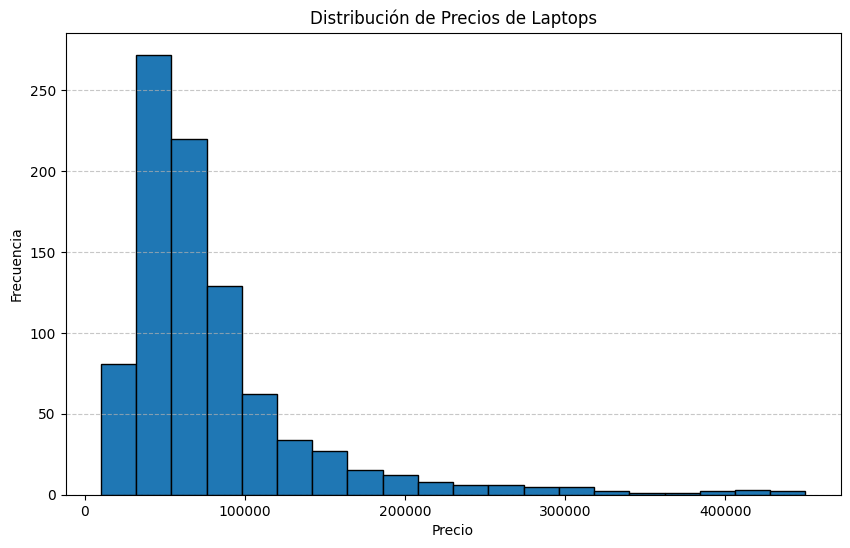

In [214]:
plt.figure(figsize = (10, 6))
plt.hist(laptop['price'], bins = 20, edgecolor = 'black')
plt.title('Distribución de Precios de Laptops')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

Observamos claramente un pico en los valores de la izquierda, indicando que una proporción significativa de las laptops analizadas se encuentra en el rango de precios más bajo. A medida que avanzamos hacia la derecha en el eje de precios, la frecuencia de laptops disminuye gradualmente.


Este perfil de distribución sugiere que la mayoría de las laptops en nuestro dataset son asequibles, ubicándose en la gama de precios más baja. Sin embargo, a medida que nos acercamos a los precios más altos, la disponibilidad de laptops parece reducirse. Este hallazgo puede ser crucial para los consumidores que buscan opciones económicas, pero también indica la presencia de productos de gama alta que podrían ofrecer características premium a un costo mayor.


En resumen, la distribución de precios refleja una diversidad significativa en la accesibilidad de las laptops, desde opciones más económicas hasta productos de élite. Este entendimiento profundo de la estructura de precios sienta las bases para futuros análisis centrados en segmentos específicos del mercado y estrategias de posicionamiento de productos.







### ¿Cuál es la relación entre el precio y sus especificaciones?

En la búsqueda de comprender los factores que influyen en los precios de las laptops, dirigimos nuestra atención hacia la relación entre la puntuación de especificaciones y el costo asociado. Este intrigante gráfico de dispersión nos ofrece una visión visual de cómo la calidad técnica, representada por la puntuación de especificaciones, se relaciona con el precio de estos dispositivos. Cada punto en el gráfico representa una laptop única en nuestro conjunto de datos, permitiéndonos identificar patrones, tendencias o posibles correlaciones.

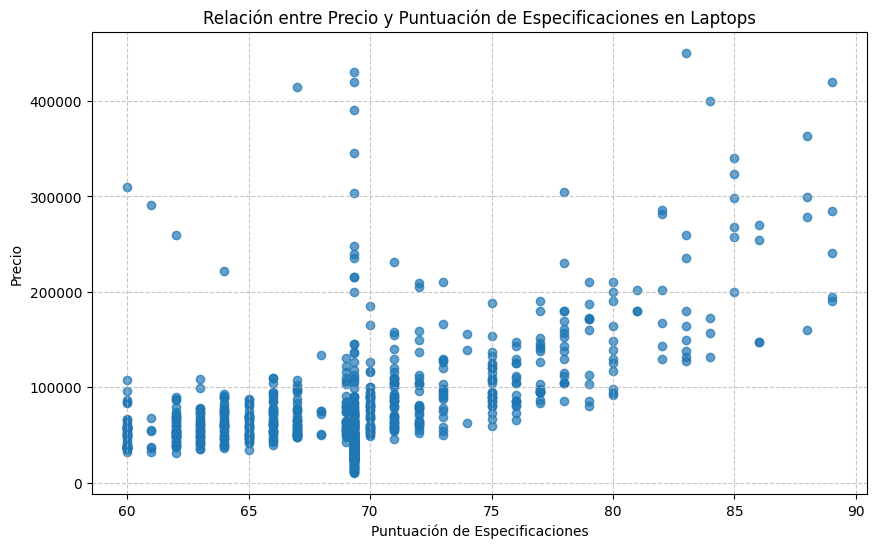

In [215]:
plt.figure(figsize = (10, 6))
plt.scatter(laptop['spec_rating'], laptop['price'], alpha = 0.7)
plt.title('Relación entre Precio y Puntuación de Especificaciones en Laptops')
plt.xlabel('Puntuación de Especificaciones')
plt.ylabel('Precio')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

La reveladora exploración de la relación entre la puntuación de especificaciones y el precio, a través del gráfico de dispersión, arroja luz sobre las complejidades que subyacen en la valoración de las laptops en nuestro dataset. La forma ascendente de izquierda a derecha indica una tendencia general: a medida que la puntuación de especificaciones aumenta, los precios tienden a elevarse. Este patrón sugiere que, en términos generales, las laptops con especificaciones técnicas más altas tienden a tener un costo asociado mayor.


Sin embargo, la presencia de outliers dispersos señala la existencia de casos singulares donde laptops con puntuaciones de especificaciones relativamente bajas pueden tener precios sorprendentemente altos, y viceversa. Estos puntos atípicos podrían deberse a factores adicionales, como características exclusivas, marcas reconocidas o elementos de diseño únicos que influyen en la percepción del valor.


En resumen, mientras que la tendencia principal indica que laptops con mejores especificaciones tienden a tener precios más altos, la presencia de outliers destaca la complejidad del mercado y la influencia de otros factores en la determinación de precios. Este análisis proporciona una base esencial para entender las dinámicas de precios y sugiere áreas de interés para investigaciones más detalladas sobre los impulsores específicos de la valoración en el mercado de laptops.







### ¿Cuales son aquellas marcas con mayor frecuencia en el dataset?

En nuestra odisea por comprender la diversidad del mercado de laptops, nos sumergimos en la identificación de las marcas más prevalentes a través de un análisis visual excepcional. Este gráfico de barras nos presenta un panorama detallado de la frecuencia relativa de cada marca en nuestro conjunto de datos.

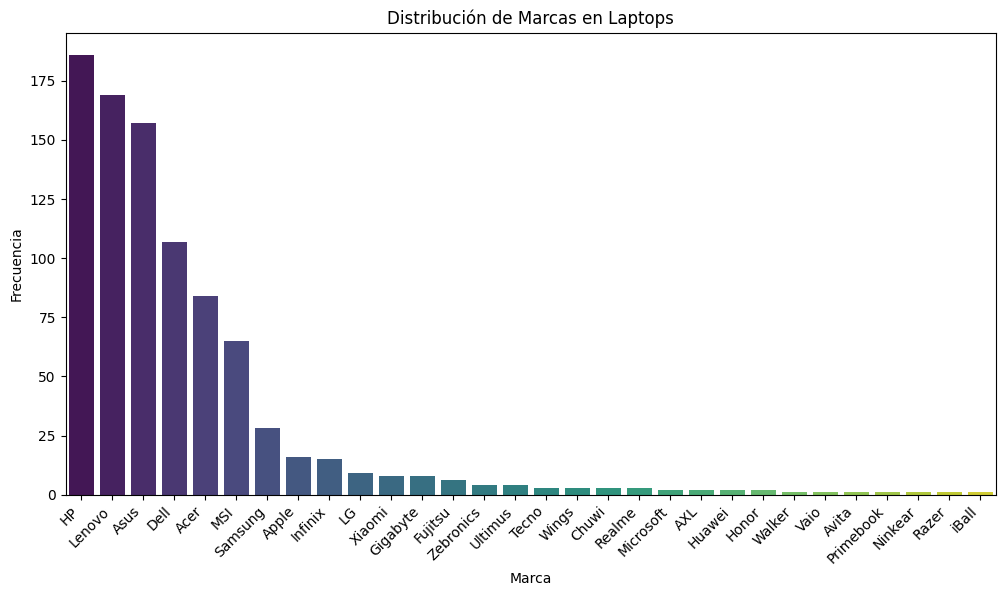

In [296]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'brand', data = laptop, palette = 'viridis', order = laptop['brand'].value_counts().index)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Distribución de Marcas en Laptops')
plt.xlabel('Marca')
plt.ylabel('Frecuencia')
plt.show()

La exhaustiva exploración de las marcas más comunes en nuestro conjunto de datos de laptops revela una jerarquía definida, destacando a los principales actores que dan forma al paisaje competitivo. El análisis, centrado en las diez marcas más destacadas: HP, Lenovo, Asus, Dell, Acer, MSI, Samsung, Apple, Infinix y LG, proporciona una visión estratégica sobre las preferencias y la distribución del mercado.

### ¿Qué precios en el mercado poseen las marcas más frecuentes?

Adentrándonos en las complejidades de las preferencias de los consumidores, nos sumergimos en un análisis detallado de la distribución de precios para las diez marcas de laptops más frecuentes. Este boxplot, diseñado meticulosamente, nos invita a explorar las variaciones en los rangos de precios, revelando patrones significativos que dan forma al mercado tecnológico.

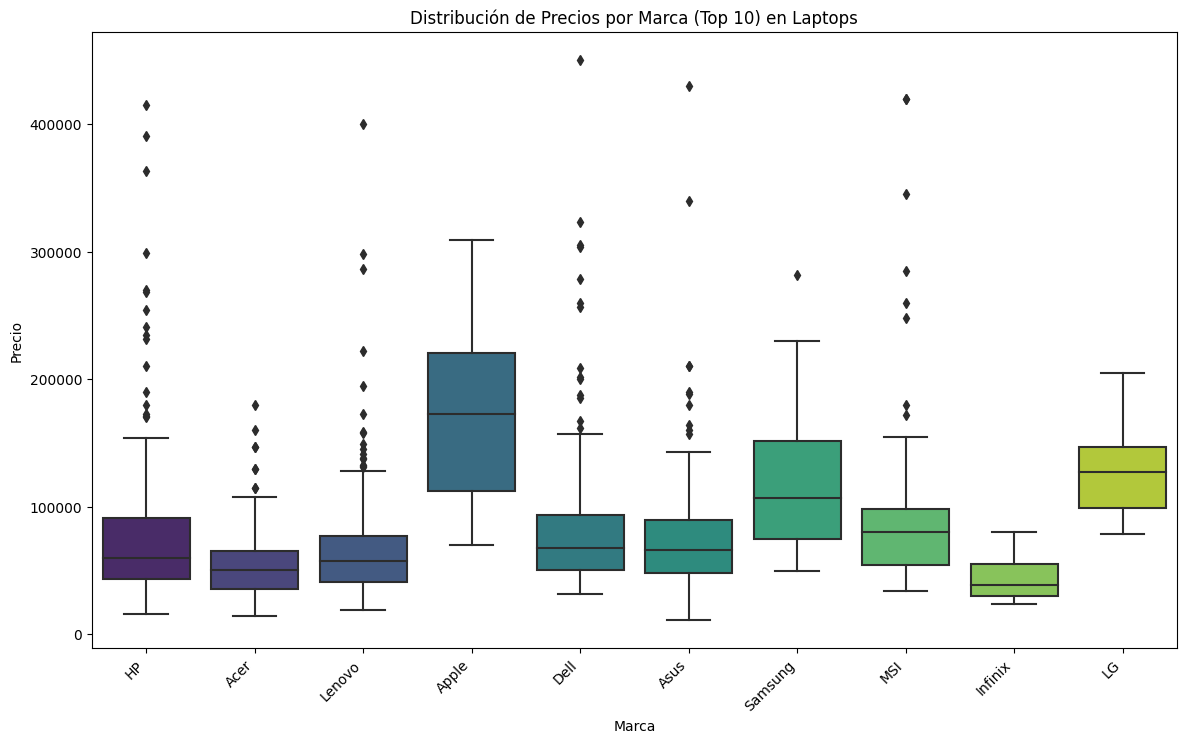

In [217]:
# Aislo a las 10 marcas más frecuentes
top_10_brands = laptop['brand'].value_counts().head(10).index
df_top_10 = laptop[laptop['brand'].isin(top_10_brands)]

plt.figure(figsize = (14, 8))
sns.boxplot(x = 'brand', y = 'price', data = df_top_10, palette = 'viridis')
plt.title('Distribución de Precios por Marca (Top 10) en Laptops')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Este detallado análisis de la distribución de precios entre las diez marcas más frecuentes en el mercado de laptops nos revela patrones distintivos y tendencias significativas. La mayoría de las marcas exhiben un rango de precios respetable, con algunas presentando varios outliers que indican opciones premium o configuraciones particulares.


Destaca de manera notable la posición de Apple en este panorama, cuyos precios se encuentran consistentemente en una gama más elevada en comparación con las otras nueve marcas. Este hallazgo sugiere que Apple, conocida por su enfoque en la innovación y el diseño, mantiene una posición única en el mercado, ofreciendo laptops que se sitúan en la parte superior del espectro de precios.

### Conclusión

La exploración minuciosa de nuestro conjunto de datos revela una rica paleta de detalles que ilustran la diversidad y complejidad del mercado de laptops. La distribución de precios destaca una amplia accesibilidad, con una concentración significativa de laptops en el rango de precios más bajos. La disminución gradual hacia valores más altos sugiere la presencia de opciones premium, generando oportunidades para estrategias de mercado que abarquen desde la economía hasta la gama alta.


La relación entre la puntuación de especificaciones y el precio revela una tendencia general ascendente, indicando que laptops con mejores especificaciones tienden a tener precios más elevados. Sin embargo, la presencia de outliers subraya la influencia de factores distintivos en la valoración, agregando capas de complejidad a las decisiones de compra.


El análisis de las marcas más comunes establece una jerarquía clara, con líderes consolidados como HP, Lenovo y Asus dominando el mercado. La singularidad de Apple, con sus precios consistentemente elevados, señala una posición distintiva en la gama alta y resalta la diversidad competitiva.


La preferencia abrumadora por Windows 11 refleja la rápida adopción de nuevas versiones de sistemas operativos, influyendo directamente en las dinámicas del mercado de laptops y destacando la importancia de las actualizaciones en las preferencias del consumidor.


El análisis detallado de los precios por marca ofrece una visión más específica, revelando que la mayoría de las marcas respetan rangos de precios, aunque con algunos outliers. Notablemente, Apple destaca con precios consistentemente más elevados, consolidando su posición en la categoría premium.


En resumen, esta odisea a través de datos detallados ha proporcionado una visión integral del mercado de laptops, desde la accesibilidad de precios hasta las preferencias de marca y las dinámicas de sistemas operativos. Estos insights son cruciales para consumidores, fabricantes y estrategas, guiando decisiones informadas en un panorama tecnológico siempre cambiante.

## Data Wrangling

### Transformaciones

In [218]:
# Droppeo IDs innecesarios
laptop = laptop.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])

In [219]:
# RAM -> int
laptop['RAM_int'] = laptop['Ram'].str.extract(r'(.+?)GB').astype(int)

In [220]:
# ROM -> tb a gb
laptop['ROM'] = laptop['ROM'].replace({'1TB': '1000GB', '2TB': '2000GB'})

In [221]:
# ROM -> int
laptop['ROM_int'] = laptop['ROM'].str.extract(r'(.+?)GB').astype(int)

In [222]:
# ROM_type -> bool
laptop['ROM_is_SSD'] = laptop['ROM_type'].map({'SSD': 1, 'Hard-Disk': 0})

In [223]:
# Uniformización de Brands
# Calculo su frecuencia
frec_marcas = laptop['brand'].value_counts()
porc_marcas = frec_marcas / len(laptop) * 100
resultados_marcas = pd.DataFrame({'Categoría': frec_marcas.index,
                                  'Frecuencia': frec_marcas.values,
                                  'Porcentaje': porc_marcas.values})

# Me quedo con el TOP 10 (>1%) y agrupo las restantes en 'Otra'
marcas_principales = resultados_marcas[resultados_marcas['Porcentaje'] > 1]['Categoría'].tolist()
laptop['Brand_Ord'] = laptop['brand'].apply(lambda x: x if x in marcas_principales else 'Otra')

In [224]:
laptop.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,RAM_int,ROM_int,ROM_is_SSD,Brand_Ord
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1,8,512,1,HP
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,8,512,1,HP
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1,8,512,1,Acer
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1,16,512,1,Lenovo
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1,8,256,1,Apple


### Creación de Features

#### **CPU**
* **[CPU_Cores]** (cantidad de núcleos del CPU)
* **[CPU_Threads]** (cantidad de hilos del CPU)
* **[CPU_Ord]** (métrica: CPU_Cores y CPU_Threads)

In [225]:
# Análisis univariado 'CPU'
frec_CPU = laptop['CPU'].value_counts()
porc_CPU = frec_CPU / len(laptop) * 100
print(porc_CPU)

CPU
Quad Core, 8 Threads               14.557671
Hexa Core, 12 Threads              14.109742
10 Cores (2P + 8E), 12 Threads     13.997760
Octa Core, 16 Threads              11.422172
12 Cores (4P + 8E), 16 Threads      9.294513
Dual Core, 4 Threads                6.159015
14 Cores (6P + 8E), 20 Threads      5.599104
Hexa Core (2P + 4E), 8 Threads      4.927212
Octa Core (4P + 4E), 12 Threads     4.815230
Dual Core, 2 Threads                4.031355
10 Cores (6P + 4E), 16 Threads      2.911534
24 Cores (8P + 16E), 32 Threads     1.791713
16 Cores (8P + 8E), 24 Threads      1.119821
14 Cores (6P + 8E)                  1.007839
5 Cores (1P + 4E), 6 Threads        0.783875
Octa Core (4P + 4E)                 0.559910
Quad Core, 4 Threads                0.447928
Octa Core, 8 Threads                0.447928
Octa Core                           0.335946
10 Cores (8P + 2E)                  0.223964
Quad Core                           0.223964
12 Cores                            0.223964
10 Cor

In [226]:
# Defino una función para procesar los registros y generar 'CPU_Cores' y 'CPU_Threads'
def obtener_cores_threads(registro):
    # Divido el registro en partes
    partes = registro.split(',')

    # Verifico si hay suficientes partes antes de intentar acceder al índice 1
    if len(partes) > 1:
        # Extraigo la parte antes de la coma y después de la coma y eliminar espacios adicionales
        parte_anterior_coma = partes[0].strip()
        parte_posterior_coma = partes[1].strip()

        # Verifico si la parte anterior a la coma contiene un número
        if 'Dual' in parte_anterior_coma:
            CPU_Cores = 2
        elif 'Quad' in parte_anterior_coma:
            CPU_Cores = 4
        elif 'Hexa' in parte_anterior_coma:
            CPU_Cores = 6
        elif 'Octa' in parte_anterior_coma:
            CPU_Cores = 8
        elif any(caracter.isdigit() for caracter in parte_anterior_coma):
            CPU_Cores = int(''.join(caracter for caracter in parte_anterior_coma if caracter.isdigit())[:2])
        else:
            CPU_Cores = None

        # Verifico si la parte posterior a la coma contiene un número
        CPU_Threads = int(''.join(caracter for caracter in parte_posterior_coma if caracter.isdigit()))

        return CPU_Cores, CPU_Threads
    else:
        # Si no hay suficientes partes, retorno None para ambas variables
        return None, None

# Aplico la función a la columna 'CPU' y asignar los resultados a 'CPU_Cores' y 'Threads'
laptop['CPU_Cores'], laptop['CPU_Threads'] = zip(*laptop['CPU'].apply(obtener_cores_threads))

# Identifico los registros que cumplen la condición (nulos en CPU_Cores y CPU_Threads)
condicion = laptop['CPU_Cores'].isnull() & laptop['CPU_Threads'].isnull()

# Array con los nuevos valores para reemplazar en CPU (investigados manualmente)
nuevos_valores = ['8 Cores, 8 Threads',
                  '8 Cores, 8 Threads',
                  '8 Cores, 8 Threads',
                  '8 Cores, 8 Threads',
                  '4 Cores, 4 Threads',
                  '8 Cores, 8 Threads',
                  '8 Cores, 8 Threads',
                  '8 Cores, 8 Threads',
                  '8 Cores, 16 Threads',
                  '14 Cores, 20 Threads',
                  '14 Cores, 20 Threads',
                  '14 Cores, 20 Threads',
                  '12 Cores, 12 Threads',
                  '12 Cores, 12 Threads',
                  '10 Cores, 10 Threads',
                  '10 Cores, 10 Threads',
                  '4 Cores, 4 Threads',
                  '10 Cores, 10 Threads',
                  '10 Cores, 10 Threads',
                  '14 Cores, 20 Threads',
                  '24 Cores, 32 Threads',
                  '14 Cores, 20 Threads',
                  '14 Cores, 20 Threads',
                  '14 Cores, 20 Threads',
                  '14 Cores, 20 Threads',
                  '14 Cores, 20 Threads',
                  '14 Cores, 20 Threads']

# Reemplazo los valores en la columna CPU basandome en la condición
laptop.loc[condicion, 'CPU'] = nuevos_valores

# Aplico la función a la columna 'CPU' y asigno los resultados a 'CPU_Cores' y 'CPU_Threads'
laptop['CPU_Cores'], laptop['CPU_Threads'] = zip(*laptop['CPU'].apply(obtener_cores_threads))

In [227]:
# Uniformación de CPU con un cálculo de una nueva métrica 'CPU_Ord'
factor = 5
laptop['CPU_Ord'] = (laptop['CPU_Threads'] * factor) + laptop['CPU_Cores']

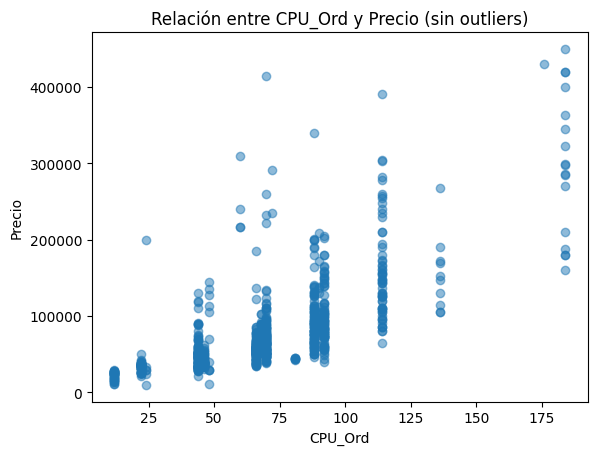

In [228]:
# Visualizo simplemente la relación con CPU_Ord y mi variable target
# Calculo los percentiles 1 y 99
percentile_1 = laptop['CPU_Ord'].quantile(0.01)
percentile_99 = laptop['CPU_Ord'].quantile(0.99)

# Filtro los datos para eliminar outliers
laptop_filtered = laptop[(laptop['CPU_Ord'] >= percentile_1) & (laptop['CPU_Ord'] <= percentile_99)]

# Visualizo el diagrama de dispersión después de eliminar outliers
plt.scatter(laptop_filtered['CPU_Ord'], laptop_filtered['price'], alpha=0.5)
plt.title('Relación entre CPU_Ord y Precio (sin outliers)')
plt.xlabel('CPU_Ord')
plt.ylabel('Precio')
plt.show()

#### **Brand**
* **[Marca_...]** (Métrica: 'brand')

In [229]:
# Aplico codificación one-hot a la variable 'marca'
marca_encoded = pd.get_dummies(laptop['Brand_Ord'], prefix='Marca')

# Concateno al DataFrame original
laptop = pd.concat([laptop, marca_encoded], axis=1)


#### **Resolution y Size** (métricas)
* **[Resolution]** (Resolución alto por ancho)
* **[PPI]** (Pixeles por pulgada)
* **[Total_Pixels]** (Pixeles en pantalla totales)

In [230]:
# Unifico variables de Resolution y Size en tres métricas nuevas
laptop['Resolution'] = (laptop['resolution_width'] * laptop['resolution_height'])
laptop['PPI'] = (laptop['resolution_width'] ** 2 + laptop['resolution_height'] ** 2) ** 0.5 / laptop['display_size']
laptop['Total_Pixels'] = (laptop['resolution_width'] * laptop['resolution_height']) * laptop['display_size']

#### **ROM**
* **[ROM_Ord]** (Métrica: 'ROM_int' y 'ROM_is_SSD')

In [231]:
# Unifico variables ROM_int y ROM_is_SSD
rom_type_factor = 3
laptop['ROM_Ord'] = laptop['ROM_int'] + (laptop['ROM_is_SSD'] * rom_type_factor)

#### **RAM**
* **[RAM_Type]** (RAM_type categorizado continuo)
* **[RAM_Ord]** (Métrica: 'RAM_int' y 'RAM_Type')

In [232]:
# Análisis univariado 'Ram_type'
registros_unicos = laptop['Ram_type'].unique()

for registro in registros_unicos:
    print(registro)

DDR4
LPDDR5
DDR5
LPDDR4
LPDDR5X
LPDDR4X
DDR3
LPDDR4x
Unified
DDR4-
LPDDR5x
DDR


In [233]:
# Uniformizo a un nuevo RAM_Type
mapeo_ram = {
    'DDR5': 9,
    'LPDDR5X': 8,
    'LPDDR5x': 8,
    'LPDDR5': 7,
    'DDR4-': 6,
    'DDR4': 5,
    'LPDDR4X': 4,
    'LPDDR4x': 4,
    'LPDDR4': 3,
    'DDR3': 2,
    'Unified': 1,
    'DDR': 0
}

laptop['RAM_Type'] = laptop['Ram_type'].map(mapeo_ram)

In [234]:
# RAM_Ord (metrica unificando ambas variables sobre RAM)
laptop['RAM_Ord'] = laptop['RAM_int'] + (laptop['RAM_Type'] * 2)

#### **GPU**
* **[GPU_Encoded]** (GPU Label Encoding)

In [235]:
registros_unicos_gpu = laptop['GPU'].unique()

# Imprimir los registros únicos
for registro in registros_unicos_gpu:
    print(registro)

4GB AMD Radeon RX 6500M
Intel UHD Graphics
Intel Iris Xe Graphics
Intel Integrated Iris Xe
Apple M1 Integrated Graphics
6GB NVIDIA GeForce RTX 4050
Intel Iris Xe
Intel Integrated UHD
Intel Integrated UHD Graphics
4GB NVIDIA GeForce RTX 3050
ARM Mali G72
AMD Radeon Graphics
4GB NVIDIA GeForce RTX 2050
4GB NVIDIA GeForce GTX 1650
AMD Radeon Vega 7
8-Core GPU
AMD Radeon AMD
AMD Integrated
8GB NVIDIA GeForce RTX 4070
4GB AMD Radeon RX 6500M Graphics
AMD Graphics
8GB NVIDIA GeForce RTX 3070 Ti
Intel Integrated Integrated
Intel Graphics
6GB NVIDIA GeForce RTX 3050
Intel UHD Graphics 
16GB NVIDIA GeForce RTX 4090
AMD Radeon Radeon Graphics
8GB NVIDIA GeForce RTX 4060
Intel Integrated Intel UHD Graphics
4GB NVIDIA GeForce RTX 3050 Ti
Intel Integrated Intel UHD
4GB NVIDIA GeForce GTX 3050
AMD Radeon Vega 7 Graphics
4GB NVIDIA 
Intel Integrated
Intel Iris XE Graphics 
GB NVIDIA GeForce RTX 2050
8GB NVIDIA GeForce RTX 3070 Ti 
10-Core GPU
4GB NVIDIA GeForce RTX 3050 Graphics
8GB AMD Radeon RX 665

Al poseer una inmensa variedad de registros únicos en la variable GPU, optaremos por tomar el camino de Label Encoding ya que es la solución más práctica teniendo en cuenta el propósito de la variable y las dificultades que presenta su gran cantidad de valores únicos.

In [236]:
from sklearn.preprocessing import LabelEncoder

# Inicializo LabelEncoder
label_encoder = LabelEncoder()

# Codifico la variable 'GPU' en valores numéricos
laptop['GPU_Encoded'] = label_encoder.fit_transform(laptop['GPU'])

# Verifico los valores únicos codificados
print(laptop['GPU_Encoded'].unique())

[ 19 126 123 111  91  53 121 112 115  33  90  80  31  27  85  57  79  70
  64  20  69  60 105  98  50 127   7  83  63 109  37 108  30  86  25 102
 120  92  61   1  36  58 101 128  94  82 107  81 132  75  26  72  43  99
 119 100  87  48  74  39  73  17  29  95  40 118  32  34  88  46  96  21
   3 122  14   9   0  52  62  38   6 124  42   5  15  11  84  89  10  97
 114 117  24 116  23 129  41  93  54   8  78   4  67  22  16 103 104  65
 110 113 106 133  71  35  12  55  59  45   2  51  77 131  76  44 125  68
  56  13  66  47  28  49 130  18]


#### **Spec_Rating_II**

In [237]:
# Nuevo Spec Rating calculado con las métricas previamente obtenidas
# Normalizo las métricas
laptop['CPU_Ord_Normalized'] = (laptop['CPU_Ord'] - laptop['CPU_Ord'].min()) / (laptop['CPU_Ord'].max() - laptop['CPU_Ord'].min())
laptop['Total_Pixels_Normalized'] = (laptop['Total_Pixels'] - laptop['Total_Pixels'].min()) / (laptop['Total_Pixels'].max() - laptop['Total_Pixels'].min())
laptop['ROM_Ord_Normalized'] = (laptop['ROM_Ord'] - laptop['ROM_Ord'].min()) / (laptop['ROM_Ord'].max() - laptop['ROM_Ord'].min())
laptop['RAM_Int_Normalized'] = (laptop['RAM_int'] - laptop['RAM_int'].min()) / (laptop['RAM_int'].max() - laptop['RAM_int'].min())

# Creo la métrica compuesta
laptop['Spec_Rating_II'] = (
    laptop['CPU_Ord_Normalized'] +
    laptop['Total_Pixels_Normalized'] +
    laptop['ROM_Ord_Normalized'] +
    laptop['RAM_Int_Normalized']
) / 4  # Divido por 4 para obtener un promedio ponderado

#### **Price_Log**

In [238]:
# Normalizo mi target
laptop['Price_Log'] = np.log(laptop['price'])
laptop[['price', 'Price_Log']].head()

,price,Price_Log
0,49900,10.817776
1,39900,10.594132
2,26990,10.203222
3,59729,10.997573
4,69990,11.156108


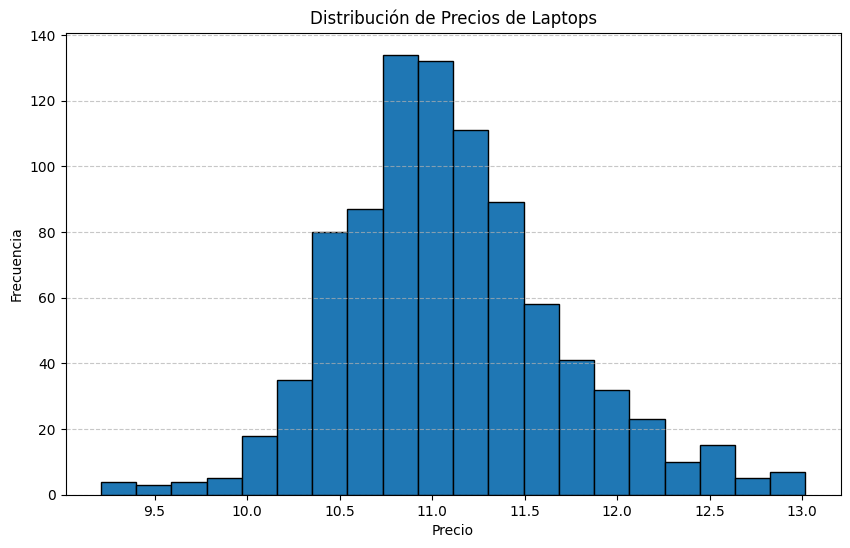

In [239]:
# Visualizo la nueva distribución de los precios (log)
plt.figure(figsize = (10, 6))
plt.hist(laptop['Price_Log'], bins = 20, edgecolor = 'black')
plt.title('Distribución de Precios de Laptops')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

### Análisis correlación features y variable target

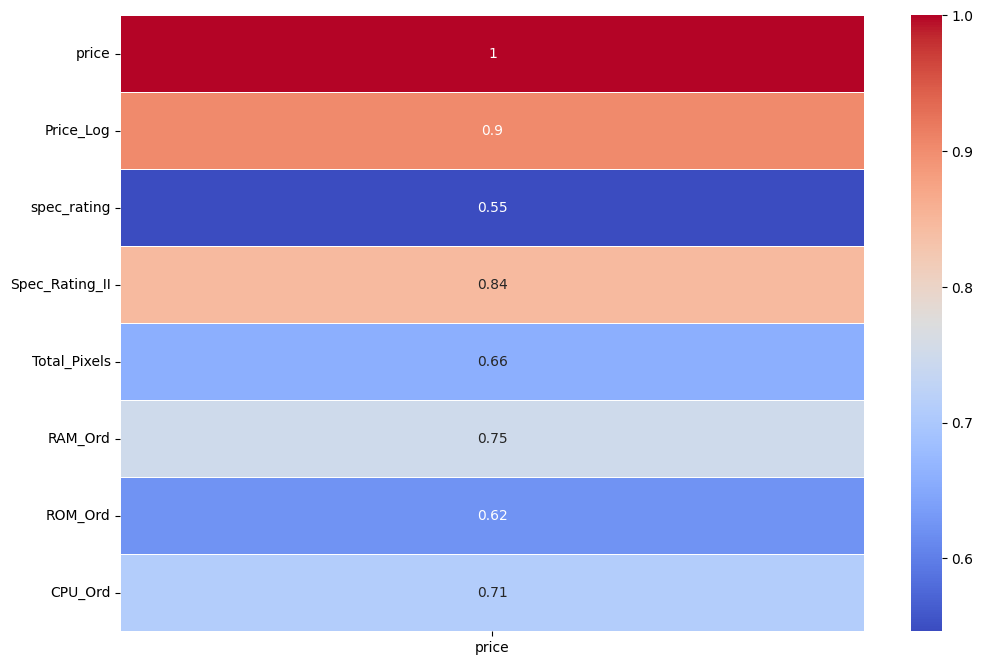

In [240]:
# Selecciono solo las variables numéricas
numeric_features = laptop.select_dtypes(include=['float64', 'int64', 'int'])
numeric_features = laptop[['price',
                           'Price_Log',
                           'spec_rating',
                           'Spec_Rating_II',
                           'Total_Pixels',
                           'RAM_Ord',
                           'ROM_Ord',
                           'CPU_Ord']]

# Calculo la matriz de correlación
correlation_matrix = numeric_features.corr()
#sorted_correlation = correlation_matrix[['price']].sort_values(by='price', ascending=False)

# Visualizo el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

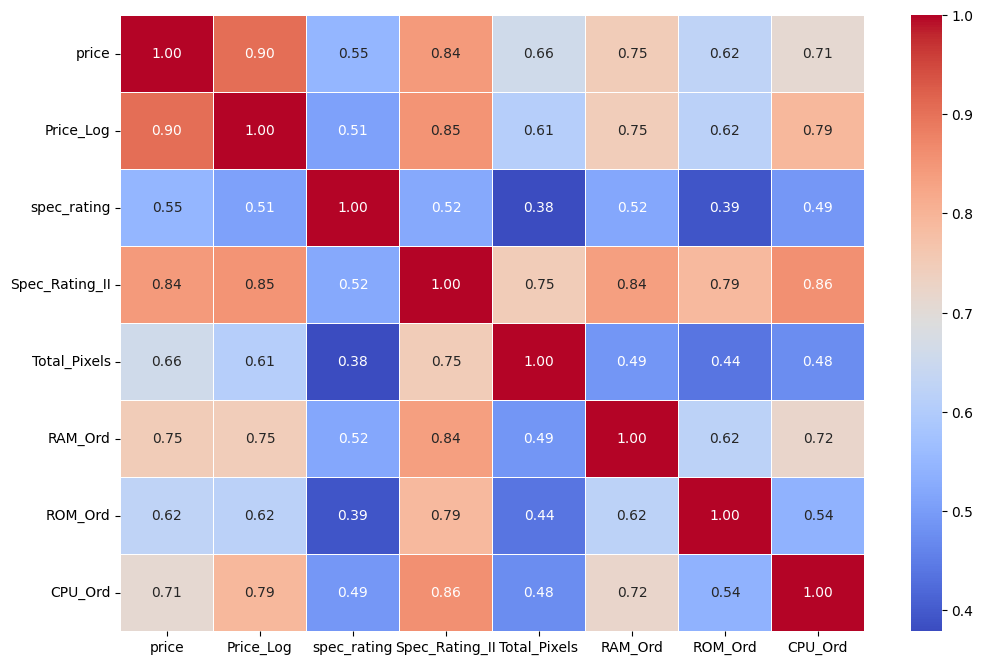

In [241]:
# Profundizo correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

Después de una serie de procesos de manipulación de datos y la creación de nuevas características, nos complace informar sobre el éxito alcanzado al establecer correlaciones significativas con nuestra variable objetivo, el precio. Al revisar las relaciones entre diversas variables y el precio, destacan varias que han demostrado ser particularmente relevantes.

En primer lugar, la variable 'Price_Log' muestra una correlaciósumamentete alta del 90%, indicando una relación sustancial con el prec, claro estáio. Además, 'Spec_Rating' ha revelado una correlación del 55%, evidenciando su importancia en la predicción del precio.

'Spec_Rating_II' emerge como una destacada variable, exhibiendo una sólida correlación del 84%. Este hallazgo sugiere que 'Spec_Rating_II' desempeñará un papel crucial en nuestras predicciones. Continuando con los aspectos relevantes, 'Total_Pixels' ha demostrado una correlación del 66%, sugiriendo una conexión considerable con el precio.

En cuanto a las características relacionadas con el hardware, 'RAM_Ord', 'ROM_Ord' y 'CPU_Ord' han presentado correlaciones del 75%, 62%, y 71%, respectivamente. Estas relaciones sólidas respaldan la importancia de estas variables en la predicción del precio de los productos.

En conclusión, el proceso de data wrangling y creación de features ha resultado fructífero al identificar variables con correlaciones significativas con el precio, superando el umbral de 0.55 en varios casos. Estos resultados fortalecen nuestra confianza en la capacidad del conjunto de datos mejorado para respaldar análisis y predicciones más precisas del precio de los productos en c

Sin embargo, esto no llegó a su fin ya que es un arduo trabajo el que queda por delante para exprimir todo el jugo de cada variable presente en el dataset. Tenemos por ejemplo el caso de las GPU que es sabido que su aporte al precio final de una laptop es muy importante, pero queda un largo camino para procesar esta variable. Hay que poner las manos a la obra y continuar!uestión.

## Modelado

### Train y Test

In [242]:
cantidad_registros = laptop.shape[0]
semilla = 2
np.random.seed(semilla)
serie_random = np.random.rand(cantidad_registros)
laptop['Train'] = np.where(serie_random < 0.3, 0, 1)

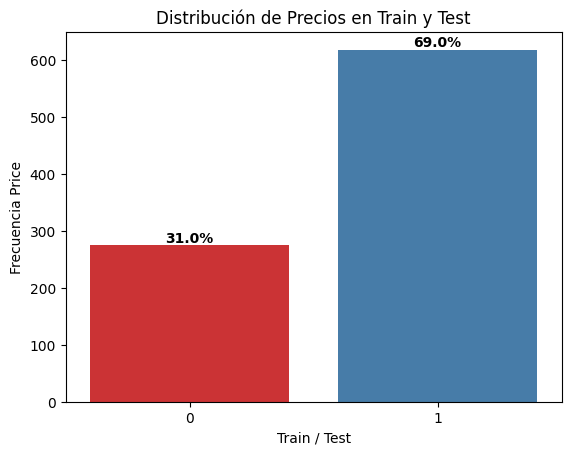

In [243]:
cantidad = len(laptop['price'])

sns.countplot(data = laptop,
              x = "Train",
              palette = 'Set1')
plt.xlabel('Train / Test')
plt.ylabel('Frecuencia Price')
plt.title('Distribución de Precios en Train y Test')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0
    y_text = p.get_height()
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%',
            ha = 'center',
            va = 'bottom',
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

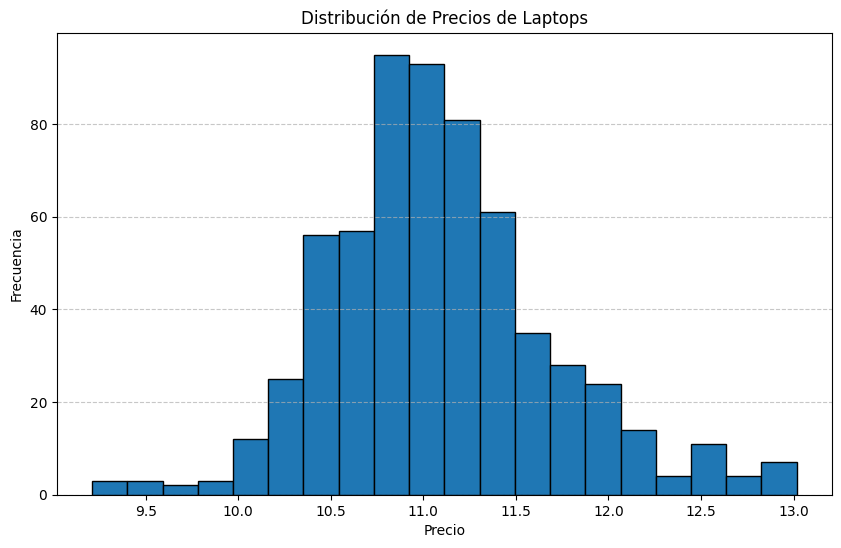

In [244]:
laptop_train = laptop[laptop['Train'] == 1]
laptop_test = laptop[laptop['Train'] == 0]

tyt_gr = laptop_train # laptop_train / laptop_test

plt.figure(figsize = (10, 6))
plt.hist(tyt_gr['Price_Log'], bins = 20, edgecolor = 'black')
plt.title('Distribución de Precios de Laptops')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [245]:
# Comprobamos la exitosa segmentación del dataset
statistics_train = laptop.groupby('Train').agg({'price': ['mean', 'std', 'min', 'max'],
                                              'Price_Log': ['mean', 'std', 'min', 'max']}).reset_index()
print(statistics_train)

  Train         price                               Price_Log            \
                 mean           std    min     max       mean       std   
0     0  79100.523636  55081.074586  10990  344990  11.092257  0.594341   
1     1  80266.461165  63329.252322   9999  450039  11.090401  0.604937   

                        
        min        max  
0  9.304741  12.751271  
1  9.210240  13.017090  


### Modelo: Regresión lineal con features simplificados (Spec_Rating_III, spec_rating y Brand_Mean)

Mean Squared Error (MSE) en entrenamiento: 0.10188495460217373
R-squared (R2) en entrenamiento: 0.7211357484959737


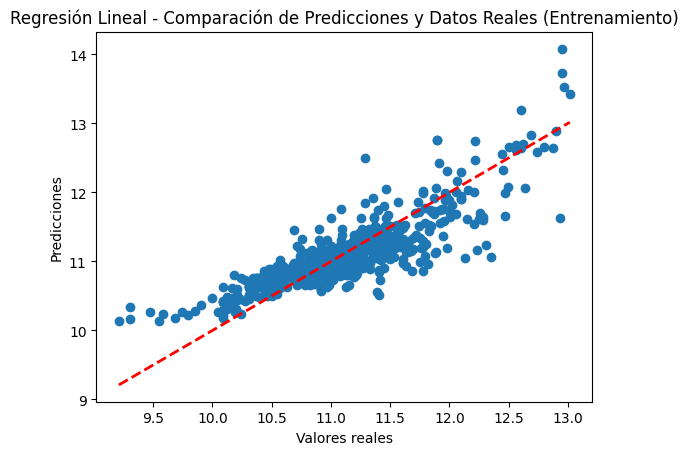

In [247]:
df = laptop_train

# Separo las variables predictoras (features) y la variable target (precio)
X_train = df[df['Train'] == 1][['Spec_Rating_II', 'spec_rating']]
y_train = df[df['Train'] == 1]['Price_Log']

# Inicializo el modelo de regresión lineal
model = LinearRegression()

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hago predicciones en el conjunto de entrenamiento (puedes usar el conjunto de prueba si lo prefieres)
y_pred_train = model.predict(X_train)

# Evaluo el rendimiento del modelo en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')

# Visualizo las predicciones en comparación con los datos reales en el conjunto de entrenamiento
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal - Comparación de Predicciones y Datos Reales (Entrenamiento)')
plt.show()

No es un mal modelo para comenzar, la idea es llegar a un valor de R Cuadrado mucho más cercano a 1 y disminuir el MSE lo más posible, seguiremos intentando con otro conjunto de features.

### Modelo: Regresión lineal completa (Con todos los features creados y normalizados)

Mean Squared Error (MSE) en entrenamiento: 0.09439594647832832
R-squared (R2) en entrenamiento: 0.7416335408650068


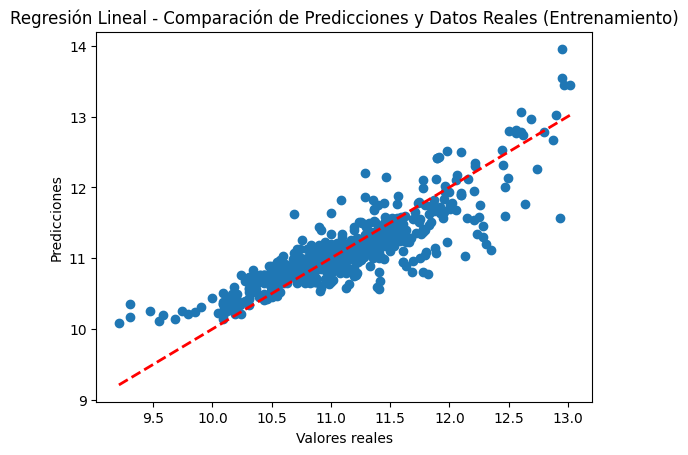

In [248]:
df = laptop_train

# Separo las variables predictoras (features) y la variable target (precio)
X_train = df[df['Train'] == 1][['spec_rating', 'Spec_Rating_II', 'CPU_Ord', 'RAM_Ord', 'ROM_Ord', 'Total_Pixels']]
y_train = df[df['Train'] == 1]['Price_Log']

# Inicializo el modelo de regresión lineal
model = LinearRegression()

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hago predicciones en el conjunto de entrenamiento (puedes usar el conjunto de prueba si lo prefieres)
y_pred_train = model.predict(X_train)

# Evaluo el rendimiento del modelo en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')

# Visualizo las predicciones en comparación con los datos reales en el conjunto de entrenamiento
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal - Comparación de Predicciones y Datos Reales (Entrenamiento)')
plt.show()

Mejoramos un poquito los valores deseados, pero aún así seguimos sin cambios diferenciales, optaremos por cambiar el tipo de modelo para conseguir predicciones más acertivas.

### Modelo 3: Random Forest Regressor completo (Con todos los features creados y normalizados)

Mean Squared Error (MSE) en entrenamiento (Random Forest): 0.007843425813099639
R-squared (R2) en entrenamiento (Random Forest): 0.9785321485675892


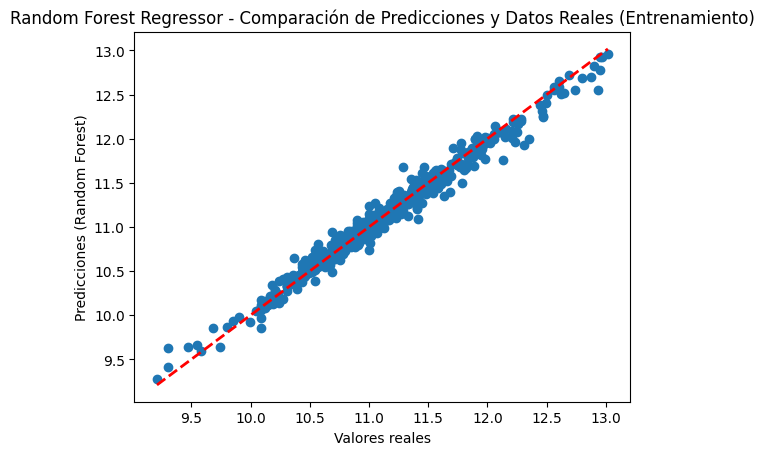

In [281]:
df = laptop_train

# Separo las variables predictoras (features) y la variable target (precio)
X_train = df[df['Train'] == 1][['spec_rating', 'Spec_Rating_II', 'CPU_Ord', 'RAM_Ord', 'ROM_Ord', 'Total_Pixels', 'GPU_Encoded', 'Marca_Acer', 'Marca_Apple', 'Marca_Asus', 'Marca_Dell', 'Marca_HP', 'Marca_Infinix', 'Marca_LG', 'Marca_Lenovo', 'Marca_MSI', 'Marca_Otra', 'Marca_Samsung']]
y_train = df[df['Train'] == 1]['Price_Log']

# Inicializo el modelo Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)

# Entreno el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hago predicciones en el conjunto de entrenamiento
y_pred_train_rf = rf_model.predict(X_train)

# Evaluo el rendimiento del modelo en el conjunto de entrenamiento
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

print(f'Mean Squared Error (MSE) en entrenamiento (Random Forest): {mse_train_rf}')
print(f'R-squared (R2) en entrenamiento (Random Forest): {r2_train_rf}')

# Visualizo las predicciones en comparación con los datos reales en el conjunto de entrenamiento
plt.scatter(y_train, y_pred_train_rf)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones (Random Forest)')
plt.title('Random Forest Regressor - Comparación de Predicciones y Datos Reales (Entrenamiento)')
plt.show()

El rendimiento del modelo de Random Forest es verdaderamente destacado, evidenciado por un coeficiente de determinación (R^2) impresionante de 0.97 y un error cuadrático medio (MSE) extremadamente bajo de 0.007. Estos resultados sugieren que el modelo ha logrado capturar una proporción significativa de la variabilidad en los datos y ha generado predicciones precisas y ajustadas.

El R^2 de 0.97 indica que aproximadamente el 97% de la variabilidad en la variable objetivo, el precio, puede ser explicada por nuestro modelo. Este valor cercano a la perfección sugiere que el Random Forest ha logrado ajustarse de manera excepcional a los patrones subyacentes en los datos.

Por otro lado, el MSE de 0.007, que representa la magnitud promedio de los errores de predicción al cuadrado, es extremadamente bajo. Esto indica que las predicciones del modelo están muy cerca de los valores reales, ya que los errores son mínimos en términos cuadráticos.

Aunque estos resultados son muy alentadores, es crucial reconocer que siempre hay margen para la mejora. A pesar de alcanzar un modelo excepcional, aún queda trabajo por hacer para explorar y exprimir completamente el potencial de cada variable en el conjunto de datos. La optimización de las características y la exploración de interacciones más sutiles pueden contribuir a mejorar aún más el rendimiento del modelo.

En resumen, el Random Forest ha demostrado ser una herramienta poderosa para predecir el precio, con un R^2 excepcional y un MSE mínimo. Aunque persisten oportunidades para mejorar y afinar el modelo, los features creados durante el proceso de data wrangling han contribuido significativamente a la creación de un modelo sólido y preciso.

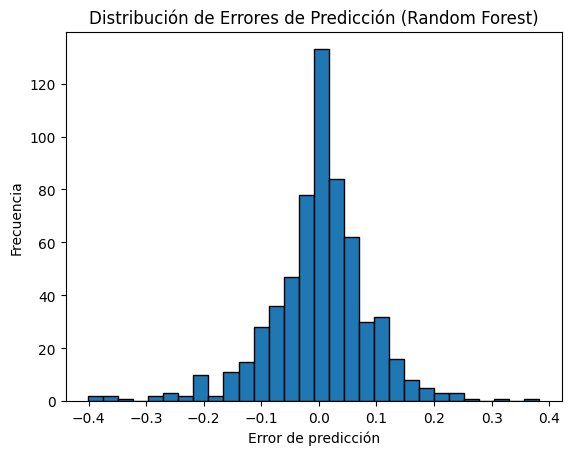

In [251]:
# Calculo los errores de predicción
errors = y_pred_train_rf - y_train

# Grafico la distribución de los errores
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel('Error de predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores de Predicción (Random Forest)')
plt.show()

Vemos que la distribución de los errores tiene una varianza aceptable, pero mejorable, con muchos casos concentrados en valores cercanos al 0, los cuales demuestran una exactitud inimaginable con nuestro target Price_Log!

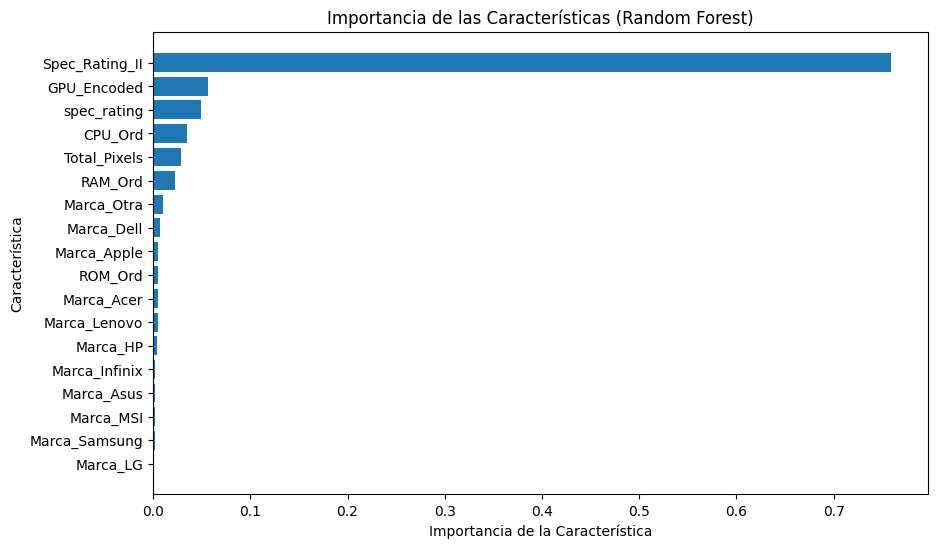

In [253]:
# Calculo el feature_importance
feature_importance = rf_model.feature_importances_
num_features = len(feature_importance)
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(num_features), feature_importance[sorted_idx], align='center')
plt.yticks(range(num_features), X_train.columns[sorted_idx])
plt.xlabel('Importancia de la Característica')
plt.ylabel('Característica')
plt.title('Importancia de las Características (Random Forest)')
plt.show()

La mejora de la predicción podemos observar, entonces, que se debe mayormente a nuestros dos nuevos features, que muestran mayor importancia por sobre el resto de las anteriormente creadas, sobre todo el nuevo Spec_rating_II :)

#### Comparación modelo Train/Test

Métricas de evaluación en el conjunto de entrenamiento:
MSE: 0.007843425813099639
R2: 0.9785321485675892


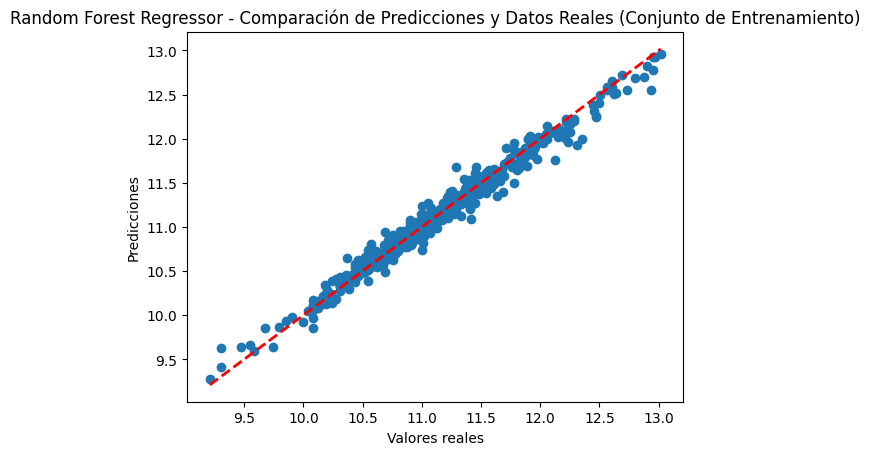


Métricas de evaluación en el conjunto de prueba:
MSE: 0.041404560215702074
R2: 0.8823589446456879


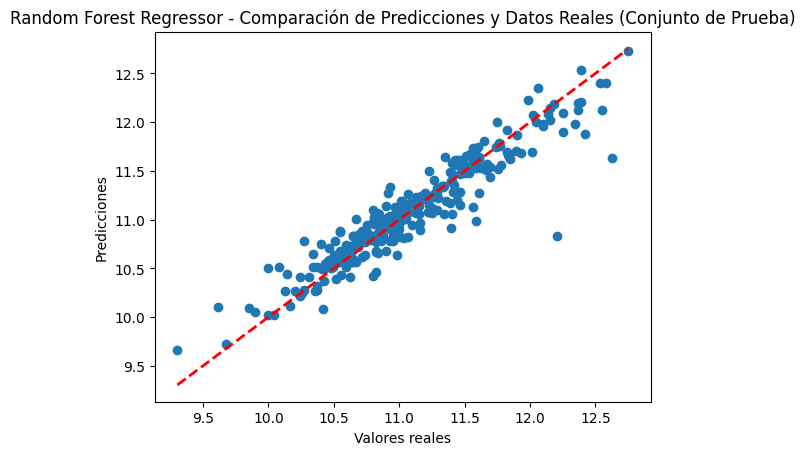

In [282]:
# Hago predicciones en el conjunto de entrenamiento
y_pred_train = rf_model.predict(X_train)

# Calculo las métricas de evaluación en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Métricas de evaluación en el conjunto de entrenamiento:")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}")

# Visualizo las predicciones en comparación con los datos reales en el conjunto de entrenamiento
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Random Forest Regressor - Comparación de Predicciones y Datos Reales (Conjunto de Entrenamiento)')
plt.show()

# Separo las variables predictoras (features) y la variable target (precio) para prueba
X_test = laptop_test[['spec_rating', 'Spec_Rating_II', 'CPU_Ord', 'RAM_Ord', 'ROM_Ord', 'Total_Pixels', 'GPU_Encoded', 'Marca_Acer', 'Marca_Apple', 'Marca_Asus', 'Marca_Dell', 'Marca_HP',
       'Marca_Infinix', 'Marca_LG', 'Marca_Lenovo', 'Marca_MSI', 'Marca_Otra',
       'Marca_Samsung']]
y_test = laptop_test['Price_Log']

# Hago predicciones en el conjunto de prueba
y_pred_test = rf_model.predict(X_test)

# Calculo las métricas de evaluación en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nMétricas de evaluación en el conjunto de prueba:")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}")

# Visualizo las predicciones en comparación con los datos reales en el conjunto de prueba
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Random Forest Regressor - Comparación de Predicciones y Datos Reales (Conjunto de Prueba)')
plt.show()

Se aprecian diferencias notables entre ambas particiones de testeo y entrenamiento, es posible de un caso de sobreajuste, optaremos por el estudio e implementación de hiperparámetros.

##### Hiperparámetros

In [271]:
# Defino el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inicializo el modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Inicializo GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Entreno GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtengo los mejores hiperparámetros después de la búsqueda
best_params = grid_search.best_params_

print("Mejores hiperparámetros encontrados:")
print(best_params)

KeyboardInterrupt: 

Mean Squared Error (MSE) en entrenamiento (Random Forest): 0.007818322928408686
R-squared (R2) en entrenamiento (Random Forest): 0.978600856427128


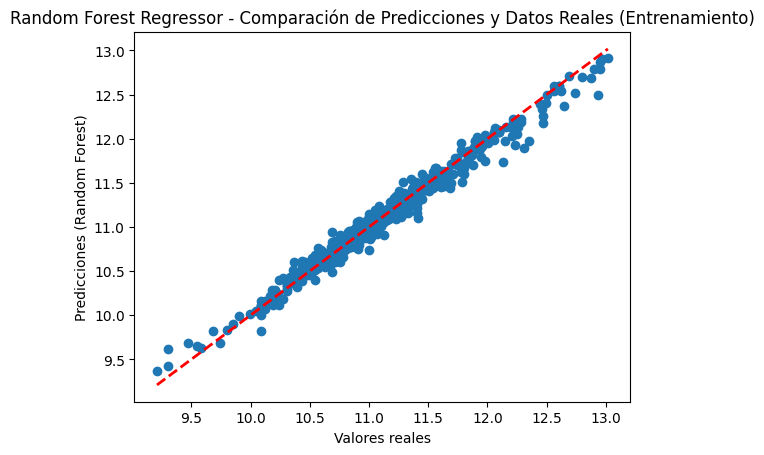

In [288]:
# RFR con mejores Hiperparámetros

df = laptop_train

# Separo las variables predictoras (features) y la variable target (precio)
X_train = df[df['Train'] == 1][['spec_rating', 'Spec_Rating_II', 'CPU_Ord', 'RAM_Ord', 'ROM_Ord', 'Total_Pixels', 'GPU_Encoded', 'Marca_Acer', 'Marca_Apple', 'Marca_Asus', 'Marca_Dell', 'Marca_HP', 'Marca_Infinix', 'Marca_LG', 'Marca_Lenovo', 'Marca_MSI', 'Marca_Otra', 'Marca_Samsung']]
y_train = df[df['Train'] == 1]['Price_Log']

# Inicializo el modelo Random Forest Regressor con Hiperparámetros
rf_model_h = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)

# Entreno el modelo con los datos de entrenamiento
rf_model_h.fit(X_train, y_train)

# Hago predicciones en el conjunto de entrenamiento
y_pred_train_rf = rf_model_h.predict(X_train)

# Evaluo el rendimiento del modelo en el conjunto de entrenamiento
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

print(f'Mean Squared Error (MSE) en entrenamiento (Random Forest): {mse_train_rf}')
print(f'R-squared (R2) en entrenamiento (Random Forest): {r2_train_rf}')

# Visualizo las predicciones en comparación con los datos reales en el conjunto de entrenamiento
plt.scatter(y_train, y_pred_train_rf)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones (Random Forest)')
plt.title('Random Forest Regressor - Comparación de Predicciones y Datos Reales (Entrenamiento)')
plt.show()

Métricas de evaluación en el conjunto de entrenamiento:
MSE: 0.007818322928408686
R2: 0.978600856427128


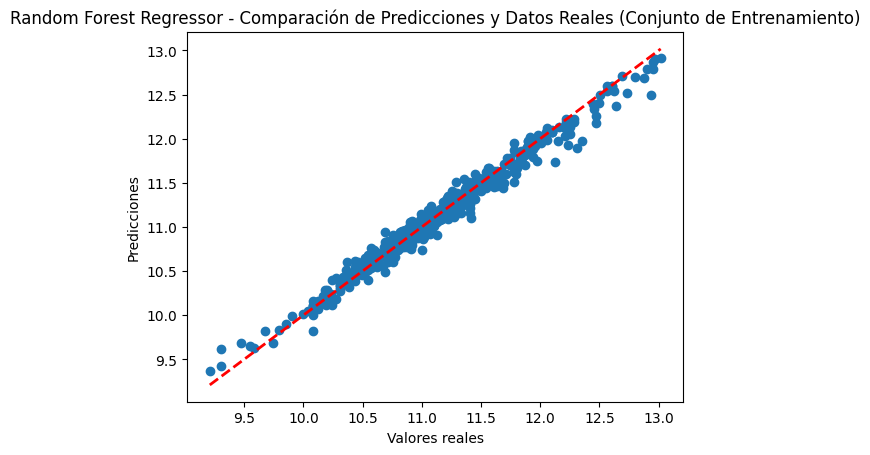


Métricas de evaluación en el conjunto de prueba:
MSE: 0.039915234960703705
R2: 0.8865905025671119


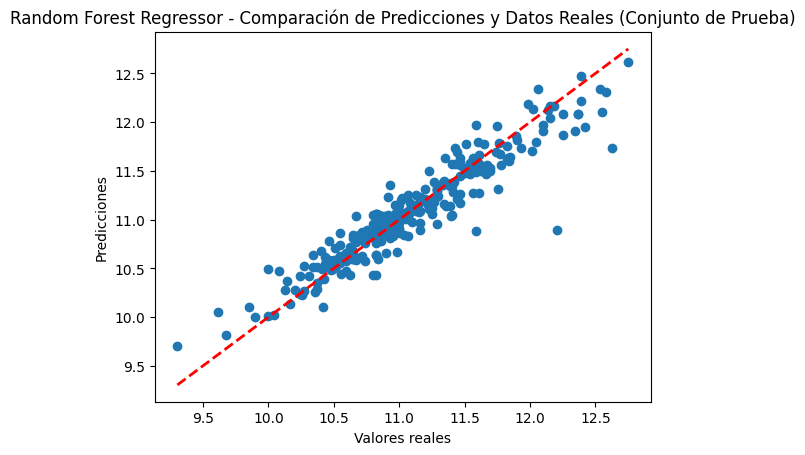

In [290]:
# Compraro Train/Test con Hiperparámetros
# Inicializo el modelo Random Forest Regressor con Hiperparámetros
rf_model_h = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)
rf_model_h.fit(X_train, y_train)

# Hago predicciones en el conjunto de entrenamiento
y_pred_train = rf_model_h.predict(X_train)

# Calculo las métricas de evaluación en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Métricas de evaluación en el conjunto de entrenamiento:")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}")

# Visualizo las predicciones en comparación con los datos reales en el conjunto de entrenamiento
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Random Forest Regressor - Comparación de Predicciones y Datos Reales (Conjunto de Entrenamiento)')
plt.show()

# Separo las variables predictoras (features) y la variable target (precio) para prueba
X_test = laptop_test[['spec_rating', 'Spec_Rating_II', 'CPU_Ord', 'RAM_Ord', 'ROM_Ord', 'Total_Pixels', 'GPU_Encoded', 'Marca_Acer', 'Marca_Apple', 'Marca_Asus', 'Marca_Dell', 'Marca_HP', 'Marca_Infinix', 'Marca_LG', 'Marca_Lenovo', 'Marca_MSI', 'Marca_Otra', 'Marca_Samsung']]
y_test = laptop_test['Price_Log']

# Hago predicciones en el conjunto de prueba
y_pred_test = rf_model_h.predict(X_test)

# Calculo las métricas de evaluación en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nMétricas de evaluación en el conjunto de prueba:")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}")

# Visualizo las predicciones en comparación con los datos reales en el conjunto de prueba
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Random Forest Regressor - Comparación de Predicciones y Datos Reales (Conjunto de Prueba)')
plt.show()

Métricas de evaluación en el conjunto de entrenamiento:
RMSE: 32231.638587241683
R2: 0.7405466043255975


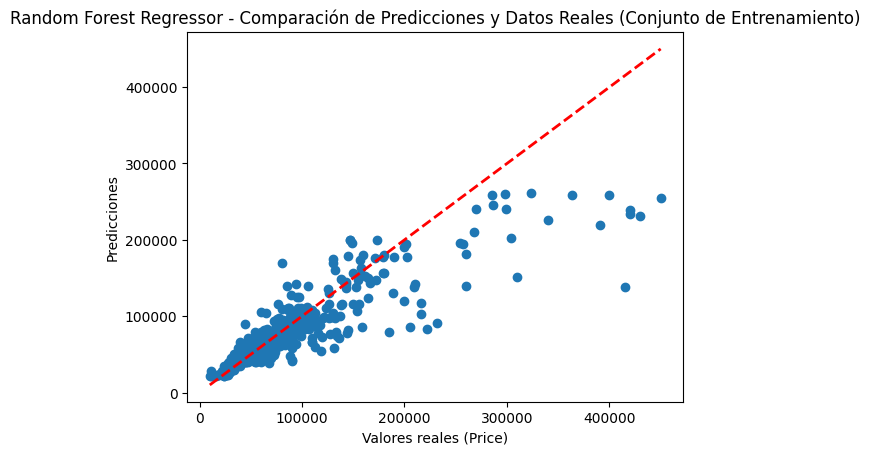


Métricas de evaluación en el conjunto de prueba:
RMSE: 27972.02520138144
R2: 0.7411637233348554


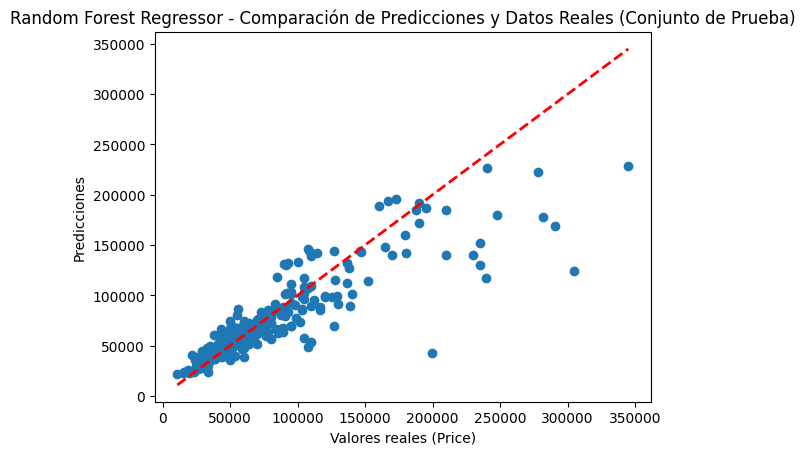

In [294]:
# Observación de resultados normalizados (log^-1)
# Aplico la inversa del log a las predicciones
y_pred_train_actual = np.exp(y_pred_train)
y_pred_test_actual = np.exp(y_pred_test)

# Obtengo los valores reales de price
y_train_actual = np.exp(y_train)
y_test_actual = np.exp(y_test)

# Calculo las métricas de evaluación en el conjunto de entrenamiento
rmse_train_actual = np.sqrt(mean_squared_error(y_train_actual, y_pred_train_actual))
r2_train_actual = r2_score(y_train_actual, y_pred_train_actual)

print("Métricas de evaluación en el conjunto de entrenamiento:")
print(f"RMSE: {rmse_train_actual}")
print(f"R2: {r2_train_actual}")

# Visualizo las predicciones en comparación con los datos reales en el conjunto de entrenamiento
plt.scatter(y_train_actual, y_pred_train_actual)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valores reales (Price)')
plt.ylabel('Predicciones')
plt.title('Random Forest Regressor - Comparación de Predicciones y Datos Reales (Conjunto de Entrenamiento)')
plt.show()

# Calculo las métricas de evaluación en el conjunto de prueba
rmse_test_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_test_actual))
r2_test_actual = r2_score(y_test_actual, y_pred_test_actual)

print("\nMétricas de evaluación en el conjunto de prueba:")
print(f"RMSE: {rmse_test_actual}")
print(f"R2: {r2_test_actual}")

# Visualizo las predicciones en comparación con los datos reales en el conjunto de prueba
plt.scatter(y_test_actual, y_pred_test_actual)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valores reales (Price)')
plt.ylabel('Predicciones')
plt.title('Random Forest Regressor - Comparación de Predicciones y Datos Reales (Conjunto de Prueba)')
plt.show()

#### Implementación de PCA y reducción de dimensionalidad

In [293]:
# Normaliza los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Aplica PCA
pca = PCA(n_components=5)  # Elige el número de componentes principales deseado
X_train_pca = pca.fit_transform(X_train_scaled)

# Inicializa y entrena el modelo Random Forest con los componentes principales
rf_model_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

# Predicciones en el conjunto de entrenamiento con PCA
y_pred_train_rf_pca = rf_model_pca.predict(X_train_pca)

# Evaluar el rendimiento del modelo en el conjunto de entrenamiento con PCA
mse_train_rf_pca = mean_squared_error(y_train, y_pred_train_rf_pca)
r2_train_rf_pca = r2_score(y_train, y_pred_train_rf_pca)

print(f'Mean Squared Error (MSE) en entrenamiento (Random Forest con PCA): {mse_train_rf_pca}')
print(f'R-squared (R2) en entrenamiento (Random Forest con PCA): {r2_train_rf_pca}')


Mean Squared Error (MSE) en entrenamiento (Random Forest con PCA): 0.009382859001144182
R-squared (R2) en entrenamiento (Random Forest con PCA): 0.9743186424086009


Si bien reducir la dimensionalidad tuvo muy buenos resultados siendo el R2 de un 0.97 y el MSE un 0.008, el RFR del modelo anterior obtuvo resultados mínimamente superiores (0.98 y 0.006 respectivamente). La diferencia no es significante, es por ello que es bueno tener en cuenta este modelo con los PCA aplicados.

## Conclusión


En este proyecto, se exploraron diferentes modelos de regresión para predecir el precio de laptops utilizando diversas características como especificaciones técnicas y marcas. Se emplearon técnicas de preprocesamiento de datos, ingeniería de características y ajuste de modelos para mejorar el rendimiento predictivo.


Se evaluaron varios modelos, incluidos modelos lineales, árboles de decisión y Random Forest Regressor, utilizando métricas de evaluación como el Mean Squared Error (MSE), el Root Mean Squared Error (RMSE) y el coeficiente de determinación (R2).


El RandomForestRegressor con hiperparámetros ajustados mediante GridSearchCV se destacó como el mejor modelo, con las siguientes métricas de evaluación:


* ### Para el logaritmo del precio:

#### Conjunto de entrenamiento:
MSE: 0.0078
R2: 0.9786

#### Conjunto de prueba:
MSE: 0.0399
R2: 0.8866


* ### Para el precio normal (inversión del logaritmo):

#### Conjunto de entrenamiento:
RMSE: 32231.64
R2: 0.7405

#### Conjunto de prueba:
RMSE: 27972.03
R2: 0.7412


Estas métricas indican que el modelo RandomForestRegressor con hiperparámetros ajustados logró un buen equilibrio entre sesgo y varianza, demostrando un rendimiento sólido tanto en el conjunto de entrenamiento como en el conjunto de prueba. La elección de este modelo se basó en su capacidad para generalizar bien a datos no vistos y su capacidad para manejar relaciones no lineales entre las características y el precio de las laptops.


En resumen, el RandomForestRegressor con hiperparámetros ajustados demostró ser el mejor modelo para predecir el precio de las laptops en este proyecto, ofreciendo una precisión confiable y un buen rendimiento en conjunto de prueba.